## 小数据

In [1]:
data = np.array([24.0, 28.9, 28.9, 29.0, 29.1, 29.1, 29.2, 29.2, 29.3, 29.4])

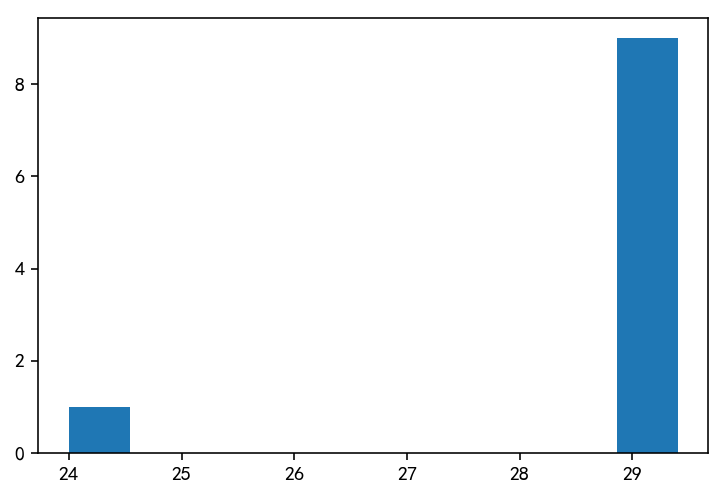

In [2]:
n,bins,_ = plt.hist(data, bins=10)

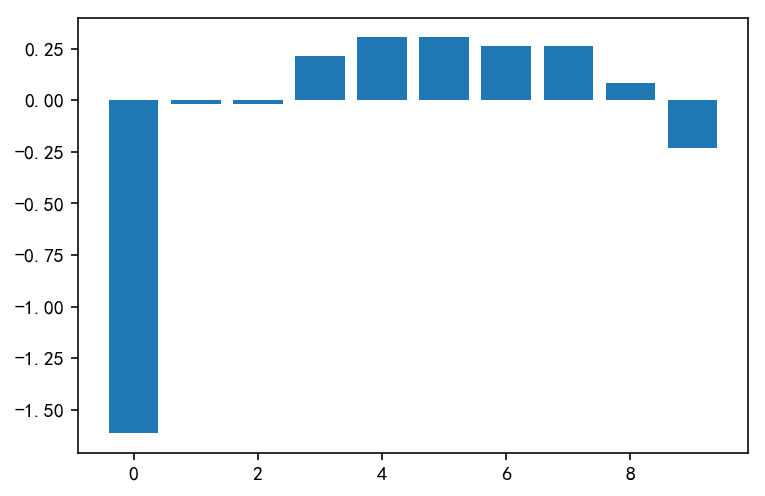

In [3]:
from sklearn.neighbors.kde import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(data.reshape((-1,1)))
score = kde.score_samples(data.reshape((-1,1)))
plt.bar(range(len(score)), score);

## 信用卡数据

In [4]:
data = pd.read_excel('default of credit card clients.xls', header=1,index_col=0)

In [5]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(data)
score = kde.score_samples(data)

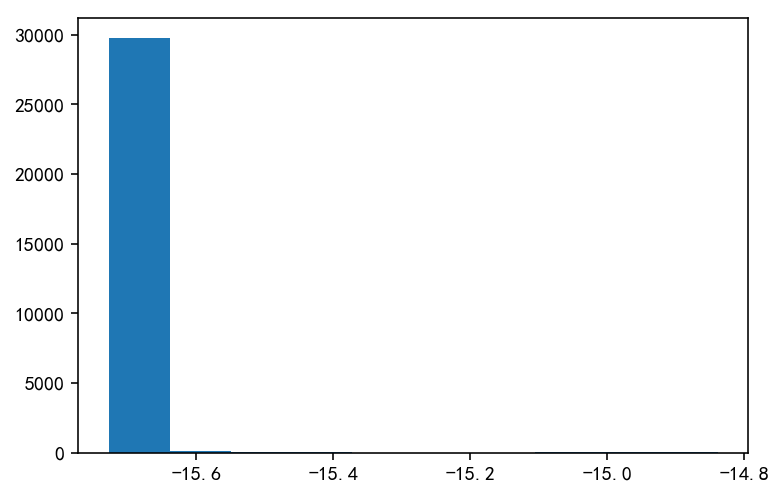

In [6]:
plt.hist(score);

### 对于小于99%的判定为异常

In [7]:
out_line = np.percentile(score,99)

In [8]:
y_pred = np.zeros(len(data))
y_pred[score > out_line] = 1

In [9]:
from sklearn.metrics import classification_report
print(classification_report(data[data.columns[-1]].values, y_pred))

             precision    recall  f1-score   support

          0       0.78      0.99      0.87     23364
          1       0.31      0.01      0.03      6636

avg / total       0.68      0.78      0.69     30000

